# Chapter 12 - Strategies to Build Superior Models

As you continue to develop your applied skills in deep learning
for time series modeling, you will need some tricks in your
back pocket to boost performance. In this chapter we outline
a number of the very best ideas that can help you out of a
sticky situation.

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
loc = "economic_x.csv"
x = pd.read_csv(loc)
x = x.drop(x.columns[[0]], axis=1)

loc = "economic_y.csv"
y = pd.read_csv(loc, header=None)
y = y.drop(y.columns[[0]], axis=1)
y.drop(0,axis = 0, inplace = True)

## A Quick Peek

In [4]:
x.head()

,GDP_trend,debt,bank_rate,inflation
0,0.079944,121.127584,5.0,11.668484
1,-0.406113,120.856960,7.0,0.488281
2,2.193677,117.024347,6.0,-0.485909
3,0.190602,117.183618,8.0,-3.613281
4,-1.505673,120.018119,2.5,-8.409321


In [9]:
y.head()

,1
1,3.7909301294127915
2,3.572756576766876
3,4.00883238276703
4,5.309584800792801
5,3.32598346693217


## Adjust the Data Scale

In [10]:
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x), 4))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y), 1))
y = scaler_y.fit_transform(y)

## Create Train and Test Set

In [11]:
x_train = x[0:136, ]
x_test = x[137:161, ]
y_train = y[0:136]
y_test = y[137:161]

## Sigmoid Limitation

One of the limitations of the sigmoid function is its gradient
becomes increasingly smaller as x increases or decreases.

This is a problem if we are using gradient descent or similar methods
and is known as the **vanishing gradient problem** (also see page
138 where we discuss this in the context of a RNN); as the
gradient gets smaller a change in the parameter’s value results
in a very small change in the network’s output. This slows
down learning to a crawl.

In particular, large negative numbers become 0 and large
positive numbers become 1. This implies that large areas of
the input space are mapped into an extremely small range.
The problem is that in these regions of the input space, **even a
very large change in the input will only produce a tiny change
in the output and hence the gradient is small.**

The vanishing gradient problem can be avoided by using activation
functions which do not squash the input space into
a narrow range. One of my favorites to try is the **Rectified linear unit $f(x) = max(0,x)$**.
It performs a threshold
operation, where any input value less than zero is set to zero

It only permits activation if a neurons output is positive;
and allows the network to compute much faster than a network
with sigmoid activation functions because it is simply a max
operation. 

Here, we will use the **Adam** optimizer. Adam, is a fairly new algorithm
for first-order gradient-based optimization of stochastic
objective functions, based on adaptive estimates of lower-order
moments.

In [12]:
from keras.models import Sequential
from keras.layers import Dense

seed = 2016
np.random.seed(seed)
fit1 = Sequential()
fit1.add(Dense(40, input_dim=4, init='uniform', activation='relu'))
fit1.add(Dense(20, init='uniform', activation='relu'))
fit1.add(Dense(1, init='normal'))

epochs = 3000
fit1.compile(loss='mean_squared_error', optimizer='adam')
fit1.fit(x_train, y_train, nb_epoch=epochs, batch_size=10)

Using TensorFlow backend.
W0224 12:45:42.277249  2152 deprecation_wrapper.py:119] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=4, activation="relu", kernel_initializer="uniform")`
  import sys
W0224 12:45:42.300254  2152 deprecation_wrapper.py:119] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0224 12:45:42.305253  2152 deprecation_wrapper.py:119] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\back

Epoch 1/3000
136/136 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 2/3000
136/136 [==============================] - 0s 103us/step - loss: 0.1208
Epoch 3/3000
136/136 [==============================] - 0s 118us/step - loss: 0.1000
Epoch 4/3000
136/136 [==============================] - 0s 119us/step - loss: 0.0743
Epoch 5/3000
136/136 [==============================] - 0s 120us/step - loss: 0.0539
Epoch 6/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0493
Epoch 7/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0498
Epoch 8/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0489
Epoch 9/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0487
Epoch 10/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0483
Epoch 11/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0483
Epoch 12/3000
136/136 [==============================] - 0s 129us

136/136 [==============================] - 0s 110us/step - loss: 0.0335
Epoch 97/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0335
Epoch 98/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0336
Epoch 99/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0336
Epoch 100/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0336
Epoch 101/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0333
Epoch 102/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0334
Epoch 103/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0333
Epoch 104/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0337
Epoch 105/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0336
Epoch 106/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0333
Epoch 107/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 96us/step - loss: 0.0314
Epoch 191/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0310
Epoch 192/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0299
Epoch 193/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0297
Epoch 194/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0299
Epoch 195/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0300
Epoch 196/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0295
Epoch 197/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0297
Epoch 198/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0299
Epoch 199/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0299
Epoch 200/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0296
Epoch 201/3000
136/136 [==============================] - 0s

136/136 [==============================] - 0s 125us/step - loss: 0.0263
Epoch 285/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0260
Epoch 286/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0262
Epoch 287/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0259
Epoch 288/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0260
Epoch 289/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0259
Epoch 290/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0261
Epoch 291/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0262
Epoch 292/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0264
Epoch 293/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0263
Epoch 294/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0261
Epoch 295/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 103us/step - loss: 0.0223
Epoch 379/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0223
Epoch 380/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0221
Epoch 381/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0220
Epoch 382/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0221
Epoch 383/3000
136/136 [==============================] - ETA: 0s - loss: 0.004 - 0s 96us/step - loss: 0.0220
Epoch 384/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0217
Epoch 385/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0219
Epoch 386/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0222
Epoch 387/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0219
Epoch 388/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0213
Epoch 389/3000
136/136 [=============

136/136 [==============================] - 0s 81us/step - loss: 0.0170
Epoch 473/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0175
Epoch 474/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0170
Epoch 475/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0171
Epoch 476/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0171
Epoch 477/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0169
Epoch 478/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0172
Epoch 479/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0174
Epoch 480/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0175
Epoch 481/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0171
Epoch 482/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0168
Epoch 483/3000
136/136 [==============================] - 0s 88us/st

136/136 [==============================] - 0s 133us/step - loss: 0.0146
Epoch 568/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0148
Epoch 569/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0143
Epoch 570/3000
136/136 [==============================] - 0s 214us/step - loss: 0.0146
Epoch 571/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0146
Epoch 572/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0144
Epoch 573/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0143
Epoch 574/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0143
Epoch 575/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0142
Epoch 576/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0141
Epoch 577/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0147
Epoch 578/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 176us/step - loss: 0.0123
Epoch 662/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0121
Epoch 663/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0125
Epoch 664/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0119
Epoch 665/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0118
Epoch 666/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0117
Epoch 667/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0116
Epoch 668/3000
136/136 [==============================] - 0s 133us/step - loss: 0.0116
Epoch 669/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0120
Epoch 670/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0123
Epoch 671/3000
136/136 [==============================] - ETA: 0s - loss: 0.006 - 0s 118us/step - loss: 0.0116
Epoch 672/3000
136/136 [==========

136/136 [==============================] - 0s 110us/step - loss: 0.0108
Epoch 755/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0109
Epoch 756/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0108
Epoch 757/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0108
Epoch 758/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0111
Epoch 759/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0108
Epoch 760/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0109
Epoch 761/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0111
Epoch 762/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0110
Epoch 763/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0108
Epoch 764/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0110
Epoch 765/3000
136/136 [==============================] - 0s 88us/st

136/136 [==============================] - 0s 103us/step - loss: 0.0102
Epoch 850/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0099
Epoch 851/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0099
Epoch 852/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0097
Epoch 853/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0098
Epoch 854/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0098
Epoch 855/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0099
Epoch 856/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0098
Epoch 857/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0100
Epoch 858/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0101
Epoch 859/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0103
Epoch 860/3000
136/136 [==============================] - 0s 81us/

136/136 [==============================] - 0s 88us/step - loss: 0.0097
Epoch 945/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0096
Epoch 946/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0095
Epoch 947/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0093
Epoch 948/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0093
Epoch 949/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0094
Epoch 950/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0094
Epoch 951/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0094
Epoch 952/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0099
Epoch 953/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0094
Epoch 954/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0094
Epoch 955/3000
136/136 [==============================] - 0s 88us/st

Epoch 1038/3000
136/136 [==============================] - 0s 257us/step - loss: 0.0093
Epoch 1039/3000
136/136 [==============================] - 0s 177us/step - loss: 0.0095
Epoch 1040/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0095
Epoch 1041/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0093
Epoch 1042/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0088
Epoch 1043/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0091
Epoch 1044/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0091
Epoch 1045/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0090
Epoch 1046/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0089
Epoch 1047/3000
136/136 [==============================] - 0s 136us/step - loss: 0.0086
Epoch 1048/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0092
Epoch 1049/3000
136/136 [=======

136/136 [==============================] - 0s 81us/step - loss: 0.0092
Epoch 1132/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0088
Epoch 1133/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0089
Epoch 1134/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0084
Epoch 1135/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0087
Epoch 1136/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0087
Epoch 1137/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0085
Epoch 1138/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0085
Epoch 1139/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0087
Epoch 1140/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0083
Epoch 1141/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0085
Epoch 1142/3000
136/136 [==============================] -

136/136 [==============================] - 0s 110us/step - loss: 0.0090
Epoch 1226/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0091
Epoch 1227/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0082
Epoch 1228/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0082
Epoch 1229/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0082
Epoch 1230/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0087
Epoch 1231/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0087
Epoch 1232/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0088
Epoch 1233/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0083
Epoch 1234/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0083
Epoch 1235/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0084
Epoch 1236/3000
136/136 [==============================] 

136/136 [==============================] - 0s 82us/step - loss: 0.0084
Epoch 1320/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0079
Epoch 1321/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0084
Epoch 1322/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0081
Epoch 1323/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0080
Epoch 1324/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0083
Epoch 1325/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0092
Epoch 1326/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0097
Epoch 1327/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0079
Epoch 1328/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0082
Epoch 1329/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0087
Epoch 1330/3000
136/136 [==============================] -

136/136 [==============================] - 0s 81us/step - loss: 0.0077
Epoch 1414/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0082
Epoch 1415/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0078
Epoch 1416/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0078
Epoch 1417/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0078
Epoch 1418/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0078
Epoch 1419/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0078
Epoch 1420/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0083
Epoch 1421/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0075
Epoch 1422/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0078
Epoch 1423/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0078
Epoch 1424/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 88us/step - loss: 0.0081
Epoch 1508/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0078
Epoch 1509/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0094
Epoch 1510/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0082
Epoch 1511/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0076
Epoch 1512/3000
136/136 [==============================] - 0s 74us/step - loss: 0.0078
Epoch 1513/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0080
Epoch 1514/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0074
Epoch 1515/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0073
Epoch 1516/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0085
Epoch 1517/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0081
Epoch 1518/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 88us/step - loss: 0.0084
Epoch 1602/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0075
Epoch 1603/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0071
Epoch 1604/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0074
Epoch 1605/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0091
Epoch 1606/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0081
Epoch 1607/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0074
Epoch 1608/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0074
Epoch 1609/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0073
Epoch 1610/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0073
Epoch 1611/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0083
Epoch 1612/3000
136/136 [==============================] -

136/136 [==============================] - 0s 81us/step - loss: 0.0069
Epoch 1696/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0077
Epoch 1697/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0069
Epoch 1698/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0072
Epoch 1699/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0069
Epoch 1700/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0071
Epoch 1701/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0080
Epoch 1702/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0074
Epoch 1703/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0074
Epoch 1704/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0072
Epoch 1705/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0072
Epoch 1706/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 103us/step - loss: 0.0076
Epoch 1790/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0072
Epoch 1791/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0067
Epoch 1792/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0070
Epoch 1793/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0068
Epoch 1794/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0069
Epoch 1795/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0070
Epoch 1796/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0069
Epoch 1797/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0073
Epoch 1798/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0070
Epoch 1799/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0068
Epoch 1800/3000
136/136 [==============================] 

136/136 [==============================] - 0s 81us/step - loss: 0.0064
Epoch 1884/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0067
Epoch 1885/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0075
Epoch 1886/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0066
Epoch 1887/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0063
Epoch 1888/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0078
Epoch 1889/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0066
Epoch 1890/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0065
Epoch 1891/3000
136/136 [==============================] - 0s 95us/step - loss: 0.0068
Epoch 1892/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0067
Epoch 1893/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0065
Epoch 1894/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 88us/step - loss: 0.0067
Epoch 1978/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0061
Epoch 1979/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0065
Epoch 1980/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0063
Epoch 1981/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0061
Epoch 1982/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0059
Epoch 1983/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0061
Epoch 1984/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0062
Epoch 1985/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0063
Epoch 1986/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0070
Epoch 1987/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0062
Epoch 1988/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 81us/step - loss: 0.0059
Epoch 2072/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0064
Epoch 2073/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0063
Epoch 2074/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0063
Epoch 2075/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0062
Epoch 2076/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0063
Epoch 2077/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0063
Epoch 2078/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0061
Epoch 2079/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0069
Epoch 2080/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0063
Epoch 2081/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0062
Epoch 2082/3000
136/136 [==============================] -

136/136 [==============================] - 0s 88us/step - loss: 0.0060
Epoch 2166/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0057
Epoch 2167/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0059
Epoch 2168/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0060
Epoch 2169/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0056
Epoch 2170/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0058
Epoch 2171/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0059
Epoch 2172/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0059
Epoch 2173/3000
136/136 [==============================] - 0s 74us/step - loss: 0.0059
Epoch 2174/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0058
Epoch 2175/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0064
Epoch 2176/3000
136/136 [==============================] 

136/136 [==============================] - 0s 81us/step - loss: 0.0065
Epoch 2260/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0058
Epoch 2261/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0055
Epoch 2262/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0059
Epoch 2263/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0057
Epoch 2264/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0059
Epoch 2265/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0055
Epoch 2266/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0055
Epoch 2267/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0054
Epoch 2268/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0056
Epoch 2269/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0052
Epoch 2270/3000
136/136 [==============================] -

136/136 [==============================] - 0s 88us/step - loss: 0.0051
Epoch 2354/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0054
Epoch 2355/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0054
Epoch 2356/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0058
Epoch 2357/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0067
Epoch 2358/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0072
Epoch 2359/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0073
Epoch 2360/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0064
Epoch 2361/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0050
Epoch 2362/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0055
Epoch 2363/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0051
Epoch 2364/3000
136/136 [==============================] 

136/136 [==============================] - 0s 81us/step - loss: 0.0051
Epoch 2448/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0051
Epoch 2449/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0049
Epoch 2450/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0054
Epoch 2451/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0053
Epoch 2452/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0054
Epoch 2453/3000
136/136 [==============================] - 0s 74us/step - loss: 0.0049
Epoch 2454/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0051
Epoch 2455/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0052
Epoch 2456/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0061
Epoch 2457/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0059
Epoch 2458/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 96us/step - loss: 0.0055
Epoch 2542/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0051
Epoch 2543/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0051
Epoch 2544/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0049
Epoch 2545/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0049
Epoch 2546/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0050
Epoch 2547/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0051
Epoch 2548/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0048
Epoch 2549/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0048
Epoch 2550/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0053
Epoch 2551/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0048
Epoch 2552/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 81us/step - loss: 0.0047
Epoch 2636/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0053
Epoch 2637/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0048
Epoch 2638/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0050
Epoch 2639/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0045
Epoch 2640/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0047
Epoch 2641/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0047
Epoch 2642/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0049
Epoch 2643/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0047
Epoch 2644/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0054
Epoch 2645/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0047
Epoch 2646/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 88us/step - loss: 0.0045
Epoch 2730/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0044
Epoch 2731/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0045
Epoch 2732/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0047
Epoch 2733/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0047
Epoch 2734/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0052
Epoch 2735/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0048
Epoch 2736/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0049
Epoch 2737/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0046
Epoch 2738/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0045
Epoch 2739/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0050
Epoch 2740/3000
136/136 [==============================]

136/136 [==============================] - 0s 88us/step - loss: 0.0046
Epoch 2824/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0046
Epoch 2825/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0043
Epoch 2826/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0043
Epoch 2827/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0044
Epoch 2828/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0042
Epoch 2829/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0044
Epoch 2830/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0043
Epoch 2831/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0048
Epoch 2832/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0051
Epoch 2833/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0045
Epoch 2834/3000
136/136 [==============================] 

136/136 [==============================] - 0s 81us/step - loss: 0.0042
Epoch 2918/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0046
Epoch 2919/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0043
Epoch 2920/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0046
Epoch 2921/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0045
Epoch 2922/3000
136/136 [==============================] - 0s 81us/step - loss: 0.0051
Epoch 2923/3000
136/136 [==============================] - 0s 95us/step - loss: 0.0043
Epoch 2924/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0051
Epoch 2925/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0050
Epoch 2926/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0045
Epoch 2927/3000
136/136 [==============================] - 0s 88us/step - loss: 0.0045
Epoch 2928/3000
136/136 [==============================] - 

- The predictiveness is impressive for such a small model!

<Figure size 432x288 with 0 Axes>

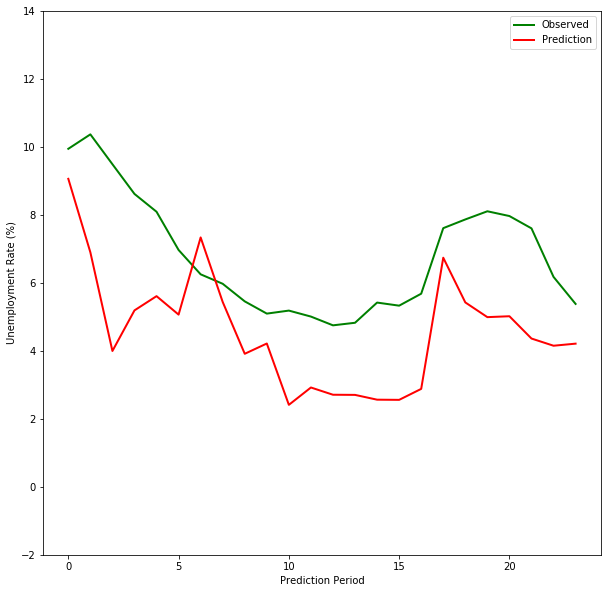

In [31]:
fig = plt.figure()

plt.figure(figsize=(10,10))

x_values = np.arange(len(pred1))
plt.plot(x_values, actual1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values, pred1, 'r-', linewidth=2, markersize=12)
plt.ylim(-2,14)
plt.xlabel('Prediction Period')
plt.ylabel('Unemployment Rate (%)')
plt.legend(('Observed', 'Prediction'),loc='upper right')

## Adding Drop Out with Keras

## Try this Simple Idea to Enchance Sucess

<font color='red'>**DroupOut**</font>

Suppose we ignore a random
number of neurons during each training round; the process of
randomly omitting a fraction of the hidden neurons is called
dropout.

To state this idea a little more formally: for each training
case, each hidden neuron is randomly omitted from the network
with a probability of p. Since the neurons are selected at
random, different combinations of neurons will be selected for
each training instance.

The idea is very simple and results in a **weak learning
model at each epoch.** Weak models have low predictive power by themselves, however **the predictions of many weak models
can be weighted and combined to produce models with much
’stronger’ predictive power.** it is similar to the **bagging** technique. Dropout can therefore be regarded as an efficient way to
perform model averaging across many neural networks.

<font color='red'>**Co-adapation**</font>

This feature allows the NN to identify neurons that are doing the same thing. In this sense it avoid to active neurons that are detecting the same feature repeatedly.

In many ways co-adaptation, is **similar to the idea of
collinearity in linear regression**, where two or more covariates
are highly correlated. It implies the covariates contain similar
information; in particular, that one covariate can be linearly
predicted from the others with a very small error. In
essence, one or more of the covariates are statistically redundant.
**Collinearity can be resolved by dropping one or more of
the covariates from the model.**

Dropout discourages co-adaptations of hidden neurons by
dropping out a fixed fraction of the activation of the neurons
during the feed forward phase of training. Dropout can also be
applied to inputs. In this case, the algorithm randomly ignores
a fixed proportion of input attributes.

**Keep the following three points in mind as you develop your
own DNN models:**
- 1. Dropout can reduce the likelihood of co-adaptation in
noisy samples by creating multiple paths to correct classification
throughout the DNN.

- 2. The larger the dropout fraction the more noise is introduced
during training; this slows down learning,

- 3. Dropout appears to offer the most benefit on very large
DNN models.

In [32]:
from keras.layers import Dropout
dropout1 = 0.05
dropout2 = 0.05
fit2 = Sequential()

fit2.add(Dense(40, input_dim=4, init='uniform', activation='relu'))
fit2.add(Dropout(dropout1))

fit2.add(Dense(20, init='uniform', activation='relu'))
fit2.add(Dropout(dropout2))

fit2.add(Dense(1, init='normal'))

fit2.compile(loss='mean_squared_error', optimizer='adam')
fit2.fit(x_train, y_train, nb_epoch=epochs, batch_size=10)

c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=4, activation="relu", kernel_initializer="uniform")`
  
W0224 14:25:13.123078  2152 deprecation.py:506] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\s

Epoch 1/3000
136/136 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 2/3000
136/136 [==============================] - 0s 184us/step - loss: 0.1133
Epoch 3/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0818
Epoch 4/3000
136/136 [==============================] - 0s 213us/step - loss: 0.0533
Epoch 5/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0492
Epoch 6/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0507
Epoch 7/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0501
Epoch 8/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0473
Epoch 9/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0500
Epoch 10/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0465
Epoch 11/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0474
Epoch 12/3000
136/136 [==============================] - 0s 132us

136/136 [==============================] - 0s 206us/step - loss: 0.0309
Epoch 97/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0320
Epoch 98/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0313
Epoch 99/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0311
Epoch 100/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0315
Epoch 101/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0315
Epoch 102/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0308
Epoch 103/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0309
Epoch 104/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0333
Epoch 105/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0299
Epoch 106/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0318
Epoch 107/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 153us/step - loss: 0.0269
Epoch 191/3000
136/136 [==============================] - 0s 129us/step - loss: 0.0275
Epoch 192/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0276
Epoch 193/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0285
Epoch 194/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0267
Epoch 195/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0261
Epoch 196/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0272
Epoch 197/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0286
Epoch 198/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0287
Epoch 199/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0277
Epoch 200/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0269
Epoch 201/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 110us/step - loss: 0.0277
Epoch 285/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0258
Epoch 286/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0269
Epoch 287/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0266
Epoch 288/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0270
Epoch 289/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0255
Epoch 290/3000
136/136 [==============================] - ETA: 0s - loss: 0.014 - 0s 118us/step - loss: 0.0250
Epoch 291/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0263
Epoch 292/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0274
Epoch 293/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0259
Epoch 294/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0260
Epoch 295/3000
136/136 [==========

136/136 [==============================] - 0s 125us/step - loss: 0.0232
Epoch 379/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0200
Epoch 380/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0209
Epoch 381/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0237
Epoch 382/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0211
Epoch 383/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0231
Epoch 384/3000
136/136 [==============================] - 0s 122us/step - loss: 0.0222
Epoch 385/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0224
Epoch 386/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0220
Epoch 387/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0210
Epoch 388/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0215
Epoch 389/3000
136/136 [==============================] - 0

136/136 [==============================] - 0s 125us/step - loss: 0.0205
Epoch 472/3000
136/136 [==============================] - 0s 158us/step - loss: 0.0216
Epoch 473/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0211
Epoch 474/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0197
Epoch 475/3000
136/136 [==============================] - 0s 122us/step - loss: 0.0172
Epoch 476/3000
136/136 [==============================] - 0s 177us/step - loss: 0.0194
Epoch 477/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0188
Epoch 478/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0210
Epoch 479/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0191
Epoch 480/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0184
Epoch 481/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0186
Epoch 482/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 213us/step - loss: 0.0188
Epoch 566/3000
136/136 [==============================] - 0s 272us/step - loss: 0.0152
Epoch 567/3000
136/136 [==============================] - 0s 221us/step - loss: 0.0157
Epoch 568/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0194
Epoch 569/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0164
Epoch 570/3000
136/136 [==============================] - 0s 221us/step - loss: 0.0168
Epoch 571/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0190
Epoch 572/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0185
Epoch 573/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0146
Epoch 574/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0177
Epoch 575/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0156
Epoch 576/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 140us/step - loss: 0.0138
Epoch 660/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0148
Epoch 661/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0187
Epoch 662/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0131
Epoch 663/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0178
Epoch 664/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0155
Epoch 665/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0132
Epoch 666/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0126
Epoch 667/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0138
Epoch 668/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0136
Epoch 669/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0139
Epoch 670/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 463us/step - loss: 0.0140
Epoch 754/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0124
Epoch 755/3000
136/136 [==============================] - 0s 250us/step - loss: 0.0114
Epoch 756/3000
136/136 [==============================] - 0s 287us/step - loss: 0.0143
Epoch 757/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0197
Epoch 758/3000
136/136 [==============================] - 0s 243us/step - loss: 0.0140
Epoch 759/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0184
Epoch 760/3000
136/136 [==============================] - 0s 217us/step - loss: 0.0138
Epoch 761/3000
136/136 [==============================] - 0s 316us/step - loss: 0.0142
Epoch 762/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0122
Epoch 763/3000
136/136 [==============================] - 0s 269us/step - loss: 0.0150
Epoch 764/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 118us/step - loss: 0.0128
Epoch 848/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0146
Epoch 849/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0117
Epoch 850/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0139
Epoch 851/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0133
Epoch 852/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0186
Epoch 853/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0171
Epoch 854/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0149
Epoch 855/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0132
Epoch 856/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0120
Epoch 857/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0129
Epoch 858/3000
136/136 [==============================] - 

136/136 [==============================] - 0s 221us/step - loss: 0.0130
Epoch 942/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0146
Epoch 943/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0112
Epoch 944/3000
136/136 [==============================] - 0s 324us/step - loss: 0.0128
Epoch 945/3000
136/136 [==============================] - 0s 261us/step - loss: 0.0144
Epoch 946/3000
136/136 [==============================] - 0s 331us/step - loss: 0.0121
Epoch 947/3000
136/136 [==============================] - 0s 279us/step - loss: 0.0125
Epoch 948/3000
136/136 [==============================] - 0s 272us/step - loss: 0.0119
Epoch 949/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0127
Epoch 950/3000
136/136 [==============================] - 0s 213us/step - loss: 0.0150
Epoch 951/3000
136/136 [==============================] - 0s 301us/step - loss: 0.0154
Epoch 952/3000
136/136 [==============================] - 

Epoch 1035/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0132
Epoch 1036/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0105
Epoch 1037/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0103
Epoch 1038/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0117
Epoch 1039/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0135
Epoch 1040/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0138
Epoch 1041/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0123
Epoch 1042/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0152
Epoch 1043/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0147
Epoch 1044/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0119
Epoch 1045/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0165
Epoch 1046/3000
136/136 [=======

136/136 [==============================] - 0s 132us/step - loss: 0.0123
Epoch 1129/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0126
Epoch 1130/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0134
Epoch 1131/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0121
Epoch 1132/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0100
Epoch 1133/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0132
Epoch 1134/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0112
Epoch 1135/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0137
Epoch 1136/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0123
Epoch 1137/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0145
Epoch 1138/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0128
Epoch 1139/3000
136/136 [=======================

136/136 [==============================] - 0s 184us/step - loss: 0.0140
Epoch 1222/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0108
Epoch 1223/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0150
Epoch 1224/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0127
Epoch 1225/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0110
Epoch 1226/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0118
Epoch 1227/3000
136/136 [==============================] - 0s 235us/step - loss: 0.0137
Epoch 1228/3000
136/136 [==============================] - 0s 243us/step - loss: 0.0113
Epoch 1229/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0125
Epoch 1230/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0125
Epoch 1231/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0146
Epoch 1232/3000
136/136 [=======================

136/136 [==============================] - 0s 125us/step - loss: 0.0155
Epoch 1315/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0125
Epoch 1316/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0123
Epoch 1317/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0097
Epoch 1318/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0125
Epoch 1319/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0129
Epoch 1320/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0116
Epoch 1321/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0110
Epoch 1322/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0130
Epoch 1323/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0125
Epoch 1324/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0125
Epoch 1325/3000
136/136 [=======================

136/136 [==============================] - 0s 125us/step - loss: 0.0119
Epoch 1408/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0102
Epoch 1409/3000
136/136 [==============================] - 0s 210us/step - loss: 0.0111
Epoch 1410/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0116
Epoch 1411/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0113
Epoch 1412/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0140
Epoch 1413/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0112
Epoch 1414/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0120
Epoch 1415/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0108
Epoch 1416/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0124
Epoch 1417/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0145
Epoch 1418/3000
136/136 [=======================

136/136 [==============================] - 0s 228us/step - loss: 0.0100
Epoch 1501/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0107
Epoch 1502/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0112
Epoch 1503/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0111
Epoch 1504/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0116
Epoch 1505/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0124
Epoch 1506/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0106
Epoch 1507/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0121
Epoch 1508/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0122
Epoch 1509/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0124
Epoch 1510/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0096
Epoch 1511/3000
136/136 [=======================

136/136 [==============================] - 0s 257us/step - loss: 0.0106
Epoch 1594/3000
136/136 [==============================] - 0s 287us/step - loss: 0.0120
Epoch 1595/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0096
Epoch 1596/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0101
Epoch 1597/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0094
Epoch 1598/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0136
Epoch 1599/3000
136/136 [==============================] - 0s 316us/step - loss: 0.0149
Epoch 1600/3000
136/136 [==============================] - 0s 177us/step - loss: 0.0122
Epoch 1601/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0094
Epoch 1602/3000
136/136 [==============================] - 0s 221us/step - loss: 0.0106
Epoch 1603/3000
136/136 [==============================] - 0s 279us/step - loss: 0.0116
Epoch 1604/3000
136/136 [=======================

136/136 [==============================] - 0s 140us/step - loss: 0.0112
Epoch 1687/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0164
Epoch 1688/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0104
Epoch 1689/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0113
Epoch 1690/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0085
Epoch 1691/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0093
Epoch 1692/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0102
Epoch 1693/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0099
Epoch 1694/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0104
Epoch 1695/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0093
Epoch 1696/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0108
Epoch 1697/3000
136/136 [=======================

136/136 [==============================] - 0s 125us/step - loss: 0.0094
Epoch 1780/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0124
Epoch 1781/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0095
Epoch 1782/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0110
Epoch 1783/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0106
Epoch 1784/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0112
Epoch 1785/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0119
Epoch 1786/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0100
Epoch 1787/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0127
Epoch 1788/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0107
Epoch 1789/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0122
Epoch 1790/3000
136/136 [=======================

136/136 [==============================] - 0s 118us/step - loss: 0.0102
Epoch 1873/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0148
Epoch 1874/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0122
Epoch 1875/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0113
Epoch 1876/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0129
Epoch 1877/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0108
Epoch 1878/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0105
Epoch 1879/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0146
Epoch 1880/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0096
Epoch 1881/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0094
Epoch 1882/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0120
Epoch 1883/3000
136/136 [=======================

136/136 [==============================] - 0s 118us/step - loss: 0.0095
Epoch 1965/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0159
Epoch 1966/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0089
Epoch 1967/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0101
Epoch 1968/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0113
Epoch 1969/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0119
Epoch 1970/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0115
Epoch 1971/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0094
Epoch 1972/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0093
Epoch 1973/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0133
Epoch 1974/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0119
Epoch 1975/3000
136/136 [=======================

136/136 [==============================] - 0s 118us/step - loss: 0.0172
Epoch 2058/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0085
Epoch 2059/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0120
Epoch 2060/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0096
Epoch 2061/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0111
Epoch 2062/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0116
Epoch 2063/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0105
Epoch 2064/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0112
Epoch 2065/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0110
Epoch 2066/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0082
Epoch 2067/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0103
Epoch 2068/3000
136/136 [=======================

136/136 [==============================] - 0s 154us/step - loss: 0.0113
Epoch 2151/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0099
Epoch 2152/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0110
Epoch 2153/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0089
Epoch 2154/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0114
Epoch 2155/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0075
Epoch 2156/3000
136/136 [==============================] - 0s 114us/step - loss: 0.0131
Epoch 2157/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0110
Epoch 2158/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0127
Epoch 2159/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0118
Epoch 2160/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0088
Epoch 2161/3000
136/136 [=======================

136/136 [==============================] - 0s 125us/step - loss: 0.0120
Epoch 2244/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0106
Epoch 2245/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0112
Epoch 2246/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0081
Epoch 2247/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0083
Epoch 2248/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0085
Epoch 2249/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0078
Epoch 2250/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0086
Epoch 2251/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0101
Epoch 2252/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0107
Epoch 2253/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0100
Epoch 2254/3000
136/136 [=======================

136/136 [==============================] - 0s 118us/step - loss: 0.0111
Epoch 2337/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0129
Epoch 2338/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0110
Epoch 2339/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0097
Epoch 2340/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0103
Epoch 2341/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0094
Epoch 2342/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0104
Epoch 2343/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0097
Epoch 2344/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0089
Epoch 2345/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0095
Epoch 2346/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0108
Epoch 2347/3000
136/136 [=======================

136/136 [==============================] - 0s 140us/step - loss: 0.0081
Epoch 2430/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0076
Epoch 2431/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0120
Epoch 2432/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0101
Epoch 2433/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0077
Epoch 2434/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0072
Epoch 2435/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0081
Epoch 2436/3000
136/136 [==============================] - 0s 161us/step - loss: 0.0085
Epoch 2437/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0096
Epoch 2438/3000
136/136 [==============================] - 0s 180us/step - loss: 0.0100
Epoch 2439/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0082
Epoch 2440/3000
136/136 [=======================

136/136 [==============================] - 0s 162us/step - loss: 0.0103
Epoch 2523/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0149
Epoch 2524/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0091
Epoch 2525/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0104
Epoch 2526/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0124
Epoch 2527/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0102
Epoch 2528/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0110
Epoch 2529/3000
136/136 [==============================] - 0s 213us/step - loss: 0.0093
Epoch 2530/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0107
Epoch 2531/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0087
Epoch 2532/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0082
Epoch 2533/3000
136/136 [=======================

136/136 [==============================] - 0s 118us/step - loss: 0.0103
Epoch 2616/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0082
Epoch 2617/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0120
Epoch 2618/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0092
Epoch 2619/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0093
Epoch 2620/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0088
Epoch 2621/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0087
Epoch 2622/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0097
Epoch 2623/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0080
Epoch 2624/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0082
Epoch 2625/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0130
Epoch 2626/3000
136/136 [=======================

136/136 [==============================] - 0s 132us/step - loss: 0.0093
Epoch 2709/3000
136/136 [==============================] - 0s 213us/step - loss: 0.0093
Epoch 2710/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0109
Epoch 2711/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0097
Epoch 2712/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0097
Epoch 2713/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0121
Epoch 2714/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0112
Epoch 2715/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0088
Epoch 2716/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0100
Epoch 2717/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0097
Epoch 2718/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0120
Epoch 2719/3000
136/136 [=======================

136/136 [==============================] - 0s 162us/step - loss: 0.0100
Epoch 2802/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0099
Epoch 2803/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0089
Epoch 2804/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0089
Epoch 2805/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0080
Epoch 2806/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0072
Epoch 2807/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0087
Epoch 2808/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0086
Epoch 2809/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0099
Epoch 2810/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0091
Epoch 2811/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0100
Epoch 2812/3000
136/136 [=======================

136/136 [==============================] - 0s 125us/step - loss: 0.0075
Epoch 2895/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0089
Epoch 2896/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0082
Epoch 2897/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0099
Epoch 2898/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0085
Epoch 2899/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0091
Epoch 2900/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0115
Epoch 2901/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0083
Epoch 2902/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0079
Epoch 2903/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0098
Epoch 2904/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0115
Epoch 2905/3000
136/136 [=======================

Epoch 2987/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0077
Epoch 2988/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0079
Epoch 2989/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0083
Epoch 2990/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0071
Epoch 2991/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0062
Epoch 2992/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0078
Epoch 2993/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0105
Epoch 2994/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0103
Epoch 2995/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0094
Epoch 2996/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0086
Epoch 2997/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0084
Epoch 2998/3000
136/136 [=======

In [33]:
pred2 = fit2.predict(x_test)
pred2 = scaler_y.inverse_transform(np.array(pred2))

<Figure size 432x288 with 0 Axes>

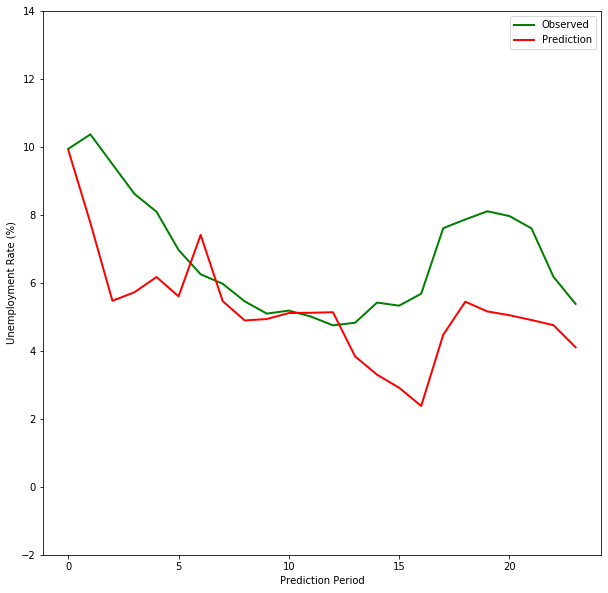

In [34]:

fig = plt.figure()

plt.figure(figsize=(10,10))

x_values = np.arange(len(pred1))
plt.plot(x_values, actual1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values, pred2, 'r-', linewidth=2, markersize=12)
plt.ylim(-2,14)
plt.xlabel('Prediction Period')
plt.ylabel('Unemployment Rate (%)')
plt.legend(('Observed', 'Prediction'),loc='upper right')

## Using Early Stopping in Keras

A training set, a validation set and a testing
set.
- The train set is used to train the DNN. The training
error is usually a monotonic function, that decreases with every
iteration.
- A validation set is used to monitor the performance of a
model. The validation error usually falls sharply during the
early stages as the network rapidly learns the functional form,
but then increases, indicating the model is starting to overfit.

In early stopping, **training is stopped at the lowest error
achieved on the validation set**. Early stopping has proven to
be highly effective in reducing over-fitting for a wide variety of
neural network applications.

In [35]:
from keras.callbacks import EarlyStopping
fit3 = Sequential()
fit3.add(Dense(40, input_dim=4, init='uniform', activation='relu'))
fit3.add(Dense(20, init='uniform', activation='relu'))
fit3.add(Dense(1, init='normal'))
fit3.compile(loss='mean_squared_error', optimizer='adam')

c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=4, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  """


## Validation Set

In [36]:
y_valid = y_train[112:136]
x_valid = x_train[112:136]

fit3.fit(x_train, y_train,
         epochs=epochs,
         batch_size=10,
         validation_data=(x_valid, y_valid),
         callbacks=[EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')]
        )

Train on 136 samples, validate on 24 samples
Epoch 1/3000
136/136 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1989
Epoch 2/3000
136/136 [==============================] - 0s 155us/step - loss: 0.1164 - val_loss: 0.1638
Epoch 3/3000
136/136 [==============================] - 0s 177us/step - loss: 0.0869 - val_loss: 0.1080
Epoch 4/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0562 - val_loss: 0.0585
Epoch 5/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0511 - val_loss: 0.0504
Epoch 6/3000
136/136 [==============================] - 0s 213us/step - loss: 0.0488 - val_loss: 0.0556
Epoch 7/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0486 - val_loss: 0.0571
Epoch 8/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0483 - val_loss: 0.0531
Epoch 9/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0481 - val_loss: 0.0522
Epoch 10/3000
136/136

136/136 [==============================] - 0s 132us/step - loss: 0.0340 - val_loss: 0.0336
Epoch 79/3000
136/136 [==============================] - 0s 177us/step - loss: 0.0338 - val_loss: 0.0341
Epoch 80/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0339 - val_loss: 0.0342
Epoch 81/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0339 - val_loss: 0.0336
Epoch 82/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0345 - val_loss: 0.0337
Epoch 83/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0340 - val_loss: 0.0352
Epoch 84/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0342 - val_loss: 0.0333
Epoch 85/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0342 - val_loss: 0.0347
Epoch 86/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0338 - val_loss: 0.0348
Epoch 87/3000
136/136 [==============================] - 0s 125us/ste

136/136 [==============================] - 0s 206us/step - loss: 0.0330 - val_loss: 0.0328
Epoch 156/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0337 - val_loss: 0.0322
Epoch 157/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0336 - val_loss: 0.0347
Epoch 158/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0327 - val_loss: 0.0315
Epoch 159/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0331 - val_loss: 0.0324
Epoch 160/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0330 - val_loss: 0.0339
Epoch 161/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0331 - val_loss: 0.0324
Epoch 162/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0328 - val_loss: 0.0323
Epoch 163/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0329 - val_loss: 0.0326
Epoch 164/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 279us/step - loss: 0.0309 - val_loss: 0.0299
Epoch 233/3000
136/136 [==============================] - 0s 96us/step - loss: 0.0307 - val_loss: 0.0313
Epoch 234/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0307 - val_loss: 0.0304
Epoch 235/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0308 - val_loss: 0.0296
Epoch 236/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0306 - val_loss: 0.0296
Epoch 237/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0305 - val_loss: 0.0304
Epoch 238/3000
136/136 [==============================] - 0s 258us/step - loss: 0.0303 - val_loss: 0.0298
Epoch 239/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0302 - val_loss: 0.0300
Epoch 240/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0301 - val_loss: 0.0295
Epoch 241/3000
136/136 [==============================] - 0s 1

136/136 [==============================] - 0s 110us/step - loss: 0.0287 - val_loss: 0.0290
Epoch 310/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0287 - val_loss: 0.0286
Epoch 311/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0284 - val_loss: 0.0288
Epoch 312/3000
136/136 [==============================] - 0s 103us/step - loss: 0.0293 - val_loss: 0.0284
Epoch 313/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0297 - val_loss: 0.0288
Epoch 314/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0287 - val_loss: 0.0292
Epoch 315/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0286 - val_loss: 0.0292
Epoch 316/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0288 - val_loss: 0.0284
Epoch 317/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0284 - val_loss: 0.0284
Epoch 318/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 140us/step - loss: 0.0269 - val_loss: 0.0277
Epoch 387/3000
136/136 [==============================] - 0s 139us/step - loss: 0.0270 - val_loss: 0.0277
Epoch 388/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0271 - val_loss: 0.0276
Epoch 389/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0267 - val_loss: 0.0278
Epoch 390/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0271 - val_loss: 0.0278
Epoch 391/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0271 - val_loss: 0.0279
Epoch 392/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0271 - val_loss: 0.0278
Epoch 393/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0269 - val_loss: 0.0280
Epoch 394/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0270 - val_loss: 0.0278
Epoch 395/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 176us/step - loss: 0.0259 - val_loss: 0.0278
Epoch 464/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0260 - val_loss: 0.0278
Epoch 465/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0257 - val_loss: 0.0277
Epoch 466/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0256 - val_loss: 0.0277
Epoch 467/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0259 - val_loss: 0.0275
Epoch 468/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0255 - val_loss: 0.0275
Epoch 469/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0259 - val_loss: 0.0277
Epoch 470/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0258 - val_loss: 0.0276
Epoch 471/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0253 - val_loss: 0.0276
Epoch 472/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 136us/step - loss: 0.0278 - val_loss: 0.0291
Epoch 541/3000
136/136 [==============================] - 0s 138us/step - loss: 0.0268 - val_loss: 0.0281
Epoch 542/3000
136/136 [==============================] - 0s 240us/step - loss: 0.0258 - val_loss: 0.0297
Epoch 543/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0250 - val_loss: 0.0274
Epoch 544/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0246 - val_loss: 0.0276
Epoch 545/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0246 - val_loss: 0.0273
Epoch 546/3000
136/136 [==============================] - 0s 235us/step - loss: 0.0246 - val_loss: 0.0273
Epoch 547/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0258 - val_loss: 0.0280
Epoch 548/3000
136/136 [==============================] - 0s 236us/step - loss: 0.0250 - val_loss: 0.0275
Epoch 549/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 118us/step - loss: 0.0236 - val_loss: 0.0270
Epoch 618/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0235 - val_loss: 0.0270
Epoch 619/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0237 - val_loss: 0.0268
Epoch 620/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0235 - val_loss: 0.0270
Epoch 621/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0237 - val_loss: 0.0270
Epoch 622/3000
136/136 [==============================] - 0s 136us/step - loss: 0.0234 - val_loss: 0.0270
Epoch 623/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0238 - val_loss: 0.0269
Epoch 624/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0241 - val_loss: 0.0272
Epoch 625/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0238 - val_loss: 0.0273
Epoch 626/3000
136/136 [==============================] - 0s 

Epoch 694/3000
136/136 [==============================] - 0s 146us/step - loss: 0.0217 - val_loss: 0.0263
Epoch 695/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0244 - val_loss: 0.0272
Epoch 696/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0225 - val_loss: 0.0259
Epoch 697/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0226 - val_loss: 0.0273
Epoch 698/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0223 - val_loss: 0.0266
Epoch 699/3000
136/136 [==============================] - 0s 128us/step - loss: 0.0217 - val_loss: 0.0261
Epoch 700/3000
136/136 [==============================] - 0s 127us/step - loss: 0.0205 - val_loss: 0.0270
Epoch 701/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0224 - val_loss: 0.0256
Epoch 702/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0213 - val_loss: 0.0253
Epoch 703/3000
136/136 [======================

136/136 [==============================] - 0s 125us/step - loss: 0.0189 - val_loss: 0.0238
Epoch 772/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0190 - val_loss: 0.0236
Epoch 773/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0187 - val_loss: 0.0233
Epoch 774/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0189 - val_loss: 0.0239
Epoch 775/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0184 - val_loss: 0.0232
Epoch 776/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0183 - val_loss: 0.0235
Epoch 777/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0189 - val_loss: 0.0233
Epoch 778/3000
136/136 [==============================] - 0s 110us/step - loss: 0.0184 - val_loss: 0.0232
Epoch 779/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0190 - val_loss: 0.0247
Epoch 780/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 118us/step - loss: 0.0175 - val_loss: 0.0219
Epoch 849/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0166 - val_loss: 0.0209
Epoch 850/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0171 - val_loss: 0.0213
Epoch 851/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0169 - val_loss: 0.0207
Epoch 852/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0166 - val_loss: 0.0210
Epoch 853/3000
136/136 [==============================] - 0s 199us/step - loss: 0.0169 - val_loss: 0.0208
Epoch 854/3000
136/136 [==============================] - 0s 279us/step - loss: 0.0168 - val_loss: 0.0212
Epoch 855/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0173 - val_loss: 0.0204
Epoch 856/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0172 - val_loss: 0.0207
Epoch 857/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 132us/step - loss: 0.0139 - val_loss: 0.0132
Epoch 926/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0139 - val_loss: 0.0134
Epoch 927/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0145 - val_loss: 0.0132
Epoch 928/3000
136/136 [==============================] - 0s 243us/step - loss: 0.0136 - val_loss: 0.0128
Epoch 929/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0137 - val_loss: 0.0129
Epoch 930/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0142 - val_loss: 0.0131
Epoch 931/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0142 - val_loss: 0.0125
Epoch 932/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0152 - val_loss: 0.0130
Epoch 933/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0151 - val_loss: 0.0152
Epoch 934/3000
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 132us/step - loss: 0.0122 - val_loss: 0.0106
Epoch 1003/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0126 - val_loss: 0.0118
Epoch 1004/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0141 - val_loss: 0.0143
Epoch 1005/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0137 - val_loss: 0.0099
Epoch 1006/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0120 - val_loss: 0.0109
Epoch 1007/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0115 - val_loss: 0.0144
Epoch 1008/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0133 - val_loss: 0.0113
Epoch 1009/3000
136/136 [==============================] - 0s 181us/step - loss: 0.0129 - val_loss: 0.0098
Epoch 1010/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0124 - val_loss: 0.0110
Epoch 1011/3000
136/136 [============================

136/136 [==============================] - 0s 110us/step - loss: 0.0114 - val_loss: 0.0119
Epoch 1079/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0119 - val_loss: 0.0145
Epoch 1080/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0126 - val_loss: 0.0091
Epoch 1081/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0116 - val_loss: 0.0091
Epoch 1082/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0113 - val_loss: 0.0088
Epoch 1083/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0114 - val_loss: 0.0089
Epoch 1084/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0114 - val_loss: 0.0102
Epoch 1085/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0123 - val_loss: 0.0087
Epoch 1086/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0116 - val_loss: 0.0083
Epoch 1087/3000
136/136 [============================

136/136 [==============================] - 0s 132us/step - loss: 0.0107 - val_loss: 0.0079
Epoch 1155/3000
136/136 [==============================] - 0s 214us/step - loss: 0.0112 - val_loss: 0.0078
Epoch 1156/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0115 - val_loss: 0.0085
Epoch 1157/3000
136/136 [==============================] - 0s 287us/step - loss: 0.0107 - val_loss: 0.0080
Epoch 1158/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0112 - val_loss: 0.0080
Epoch 1159/3000
136/136 [==============================] - ETA: 0s - loss: 0.002 - 0s 162us/step - loss: 0.0114 - val_loss: 0.0080
Epoch 1160/3000
136/136 [==============================] - 0s 243us/step - loss: 0.0111 - val_loss: 0.0096
Epoch 1161/3000
136/136 [==============================] - 0s 198us/step - loss: 0.0123 - val_loss: 0.0082
Epoch 1162/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0106 - val_loss: 0.0081
Epoch 1163/3000
136/136 [====

136/136 [==============================] - 0s 203us/step - loss: 0.0106 - val_loss: 0.0077
Epoch 1231/3000
136/136 [==============================] - 0s 225us/step - loss: 0.0106 - val_loss: 0.0079
Epoch 1232/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0106 - val_loss: 0.0079
Epoch 1233/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0105 - val_loss: 0.0079
Epoch 1234/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0110 - val_loss: 0.0074
Epoch 1235/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0109 - val_loss: 0.0119
Epoch 1236/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0119 - val_loss: 0.0075
Epoch 1237/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0111 - val_loss: 0.0075
Epoch 1238/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0105 - val_loss: 0.0074
Epoch 1239/3000
136/136 [============================

136/136 [==============================] - 0s 118us/step - loss: 0.0114 - val_loss: 0.0084
Epoch 1307/3000
136/136 [==============================] - 0s 125us/step - loss: 0.0106 - val_loss: 0.0075
Epoch 1308/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0105 - val_loss: 0.0073
Epoch 1309/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0105 - val_loss: 0.0079
Epoch 1310/3000
136/136 [==============================] - 0s 118us/step - loss: 0.0112 - val_loss: 0.0072
Epoch 1311/3000
136/136 [==============================] - 0s 213us/step - loss: 0.0107 - val_loss: 0.0086
Epoch 1312/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0106 - val_loss: 0.0076
Epoch 1313/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0102 - val_loss: 0.0074
Epoch 1314/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0104 - val_loss: 0.0075
Epoch 1315/3000
136/136 [============================

136/136 [==============================] - 0s 154us/step - loss: 0.0098 - val_loss: 0.0072
Epoch 1383/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0102 - val_loss: 0.0086
Epoch 1384/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0101 - val_loss: 0.0070
Epoch 1385/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0105 - val_loss: 0.0073
Epoch 1386/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0098 - val_loss: 0.0073
Epoch 1387/3000
136/136 [==============================] - 0s 147us/step - loss: 0.0103 - val_loss: 0.0069
Epoch 1388/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0107 - val_loss: 0.0072
Epoch 1389/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0102 - val_loss: 0.0073
Epoch 1390/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0108 - val_loss: 0.0076
Epoch 1391/3000
136/136 [============================

136/136 [==============================] - 0s 140us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 1459/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0102 - val_loss: 0.0067
Epoch 1460/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0097 - val_loss: 0.0076
Epoch 1461/3000
136/136 [==============================] - 0s 169us/step - loss: 0.0095 - val_loss: 0.0078
Epoch 1462/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0105 - val_loss: 0.0073
Epoch 1463/3000
136/136 [==============================] - 0s 154us/step - loss: 0.0102 - val_loss: 0.0083
Epoch 1464/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0101 - val_loss: 0.0071
Epoch 1465/3000
136/136 [==============================] - 0s 162us/step - loss: 0.0101 - val_loss: 0.0070
Epoch 1466/3000
136/136 [==============================] - 0s 176us/step - loss: 0.0097 - val_loss: 0.0065
Epoch 1467/3000
136/136 [============================

136/136 [==============================] - 0s 125us/step - loss: 0.0095 - val_loss: 0.0076
Epoch 1535/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0096 - val_loss: 0.0077
Epoch 1536/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0099 - val_loss: 0.0075
Epoch 1537/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0100 - val_loss: 0.0069
Epoch 1538/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0114 - val_loss: 0.0068
Epoch 1539/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0097 - val_loss: 0.0070
Epoch 1540/3000
136/136 [==============================] - 0s 161us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 1541/3000
136/136 [==============================] - 0s 140us/step - loss: 0.0102 - val_loss: 0.0101
Epoch 1542/3000
136/136 [==============================] - 0s 132us/step - loss: 0.0090 - val_loss: 0.0073
Epoch 1543/3000
136/136 [============================

136/136 [==============================] - 0s 235us/step - loss: 0.0097 - val_loss: 0.0063
Epoch 1611/3000
136/136 [==============================] - 0s 243us/step - loss: 0.0097 - val_loss: 0.0071
Epoch 1612/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0095 - val_loss: 0.0066
Epoch 1613/3000
136/136 [==============================] - 0s 235us/step - loss: 0.0096 - val_loss: 0.0080
Epoch 1614/3000
136/136 [==============================] - 0s 254us/step - loss: 0.0105 - val_loss: 0.0128
Epoch 1615/3000
136/136 [==============================] - 0s 235us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 1616/3000
136/136 [==============================] - 0s 235us/step - loss: 0.0098 - val_loss: 0.0062
Epoch 1617/3000
136/136 [==============================] - 0s 250us/step - loss: 0.0106 - val_loss: 0.0065
Epoch 1618/3000
136/136 [==============================] - 0s 257us/step - loss: 0.0101 - val_loss: 0.0064
Epoch 1619/3000
136/136 [============================

136/136 [==============================] - 0s 404us/step - loss: 0.0101 - val_loss: 0.0065
Epoch 1687/3000
136/136 [==============================] - 0s 184us/step - loss: 0.0100 - val_loss: 0.0079
Epoch 1688/3000
136/136 [==============================] - 0s 180us/step - loss: 0.0096 - val_loss: 0.0070
Epoch 1689/3000
136/136 [==============================] - 0s 191us/step - loss: 0.0097 - val_loss: 0.0071
Epoch 1690/3000
136/136 [==============================] - 0s 221us/step - loss: 0.0102 - val_loss: 0.0069
Epoch 1691/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0096 - val_loss: 0.0070
Epoch 1692/3000
136/136 [==============================] - 0s 206us/step - loss: 0.0102 - val_loss: 0.0066
Epoch 1693/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0098 - val_loss: 0.0067
Epoch 1694/3000
136/136 [==============================] - 0s 228us/step - loss: 0.0101 - val_loss: 0.0068
Epoch 1695/3000
136/136 [============================

<Figure size 432x288 with 0 Axes>

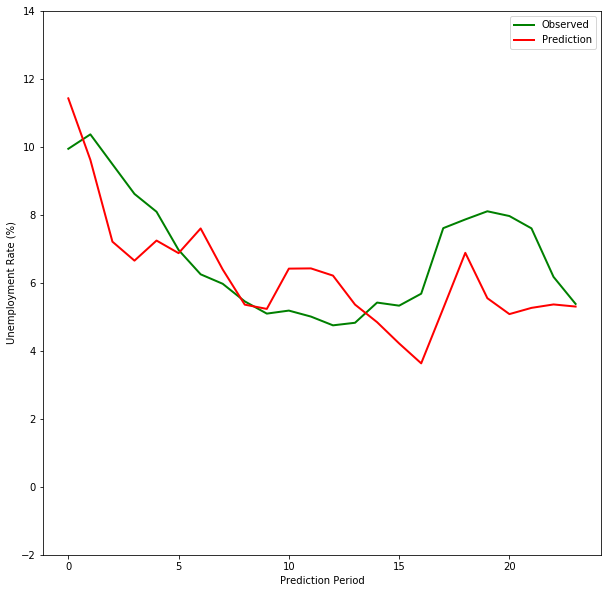

In [39]:
pred3 = fit3.predict(x_test)
pred3 = scaler_y.inverse_transform(np.array(pred3))

fig = plt.figure()
plt.figure(figsize=(10,10))

x_values = np.arange(len(pred1))
plt.plot(x_values, actual1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values, pred3, 'r-', linewidth=2, markersize=12)
plt.ylim(-2,14)
plt.xlabel('Prediction Period')
plt.ylabel('Unemployment Rate (%)')
plt.legend(('Observed', 'Prediction'),loc='upper right')

In [40]:
# NOTE
# To see the actual model weights
fit1.get_weights()

[array([[ 1.18908882e-02, -4.36342686e-01, -4.72673289e-02,
         -6.12192392e-01, -3.88217680e-02, -1.48539379e-01,
         -3.92473966e-01, -2.09758550e-01, -1.88889831e-01,
         -5.04865982e-02, -1.34651177e-02, -3.77921075e-01,
          3.60749029e-02, -1.16551101e-01, -1.32206783e-01,
         -1.22335985e-01, -1.54914543e-01, -4.79911827e-02,
         -2.67781258e-01, -3.08425967e-02,  2.58019418e-02,
         -4.70428616e-02, -3.75446886e-01, -2.51116455e-01,
         -5.04736975e-03,  7.28810951e-03,  1.11952098e-03,
          9.96492952e-02, -4.27812226e-02, -8.27102065e-02,
         -1.79137275e-01, -4.46736477e-02,  2.60521639e-02,
         -1.57062709e-01, -1.30028814e-01, -3.53024900e-01,
          1.88064668e-02, -2.08349694e-02, -4.09454219e-02,
          1.42167518e-02],
        [-5.41870892e-02, -1.09913811e-01, -4.20766957e-02,
          4.79429737e-02,  1.41299888e-03, -6.07988596e-01,
         -4.22758609e-02, -2.77530015e-01, -1.59369975e-01,
         -1.0